# Homework #1: classification

Student: GeRuiyang

Student ID: 2301212326

### Requirements

1. For this HW, we will use Give Me Some Credit on Kaggle. You may download it from the Kaggle link or CMS. Load cs-training.csv into a Pandas dataframe. Fill-in the missing values (nan) with the column means. (Use pd.fillna() or See Ch 4 of PML)

2. Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features.) 

3. Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.) 
Visualize your classifiers using the plot_decision_regions function from PML Ch. 3

4. Put your result in YOUR_GITHUB_ID/Give-Me-Some-Credit/code/Classifiers.ipynb

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC


import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion

from sklearn.model_selection import GridSearchCV

### 1. Download and data processing

In [18]:
train = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')

In [19]:
train.drop(columns=['Unnamed: 0'], inplace = True)
train.fillna(train.mean(), inplace = True)
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


### 2. LogisticRegression & maximize the prediction accuracy
- Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features.) 
- Using the 2 selected features, apply LR / SVM / decision tree. 
- Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)

In [20]:
X, y = train.iloc[:, 1:].values, train.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, 
                     random_state=0,
                     stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [21]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9338577777777778
Test accuracy: 0.9339466666666667


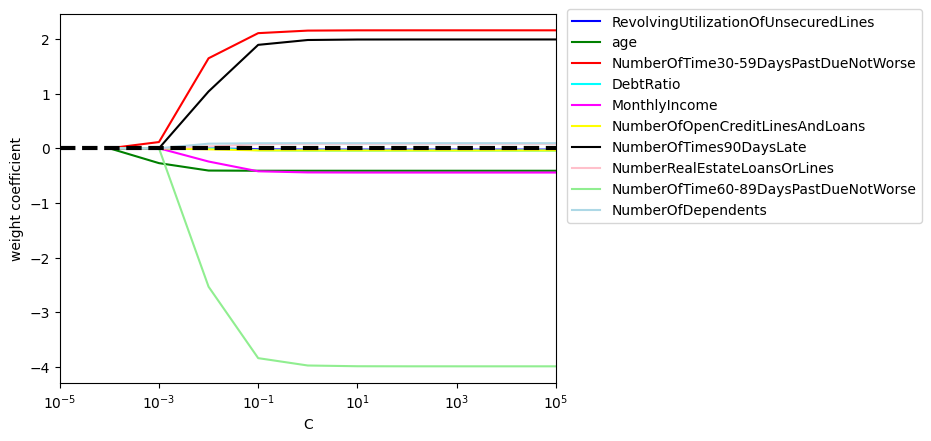

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=train.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### 3. Three Methods
- Using the 2 selected features, apply LR / SVM / decision tree. 
- Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy.
  (Just try several values. You don't need to show your answer is the maximum.) 
- Visualize your classifiers using the plot_decision_regions function from PML Ch. 3

First of all, from the image above, we select **age** and **NumberOfTime60-89DaysPastDueNotWorse** to be our features.

In [23]:
X_features =  train.loc[:,['age','NumberOfTime30-59DaysPastDueNotWorse']]
X_features_std = stdsc.fit_transform(X_features)
X_features_test = stdsc.transform(X_test)

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

##### 3.1 LR Method

In [9]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
grid_search = GridSearchCV(lr, params, cv=5, scoring='accuracy')
grid_search.fit(X_features_std, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'C': 0.001}
Best score: 0.9333266666666666


In [10]:
lr = LogisticRegression(C=0.001, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_features_std, y)

LogisticRegression(C=0.001, multi_class='ovr', random_state=1)

/var/folders/1s/gq5q_hsx1yqb2rtz9cll80f00000gn/T/ipykernel_3316/3982358129.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


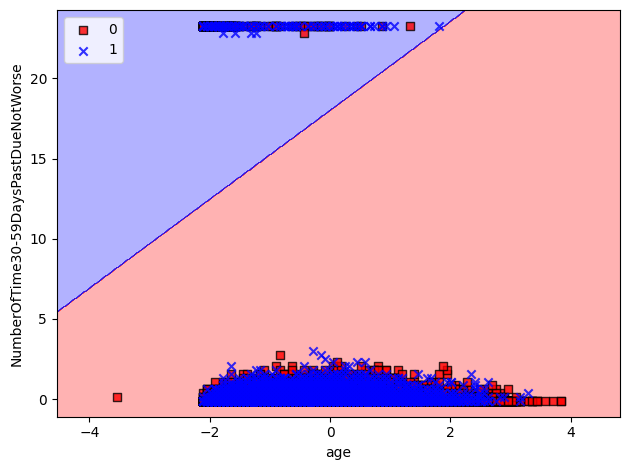

In [11]:
plot_decision_regions(X = X_features_std, y = y,
                      classifier=lr)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##### 3.2 SVM Method

In [18]:
from tqdm import tqdm

gamma_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_gamma = None

for gamma_value in tqdm(gamma_values, desc='Progress'):
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma_value, C=1.0)
    svm.fit(X_features_std, y)
    score = svm.score(X_features_std, y)
    
    if score > best_score:
        best_score = score
        best_gamma = gamma_value

print("Best gamma:", {'gamma': best_gamma})
print("Best score:", best_score)

Progress: 100%|██████████| 5/5 [1:28:18<00:00, 1059.65s/it]

Best gamma: {'gamma': 100}
Best score: 0.9345666666666667


In [19]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0)
svm.fit(X_features_std, y)

SVC(gamma=1.0, random_state=1)

/var/folders/1s/gq5q_hsx1yqb2rtz9cll80f00000gn/T/ipykernel_3316/3982358129.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


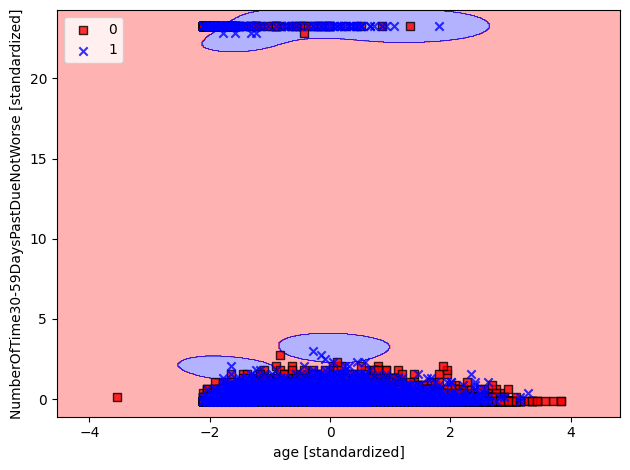

In [20]:
plot_decision_regions(X_features_std, 
                      y,
                      classifier=svm)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##### 3.3 Tree Method

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

depth = range(1,11)
best_depth = None
best_score = -1

for max_depth in depth:
    tree_model = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=max_depth, 
                                        random_state=1)
    
    scores = cross_val_score(tree_model, X_features_std, y, cv=5)
    avg_score = np.mean(scores)
    
    if avg_score > best_score:
        best_score = avg_score
        best_depth = max_depth

print("Best max_depth value:", best_depth)
print("Best average score:", best_score)

Best max_depth value: 7
Best average score: 0.9334999999999999


In [57]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=7, 
                                    random_state=1)
tree_model.fit(X_features_std, y)

DecisionTreeClassifier(max_depth=7, random_state=1)

(254, 94)


/var/folders/1s/gq5q_hsx1yqb2rtz9cll80f00000gn/T/ipykernel_2926/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


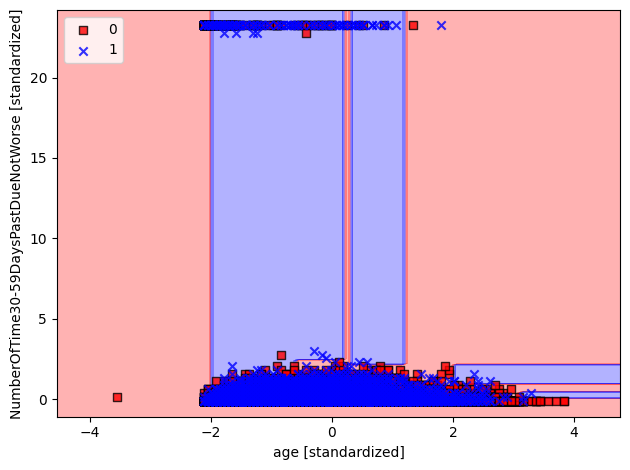

In [58]:
plot_decision_regions(X_features_std, y,
                      classifier=tree_model)

plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

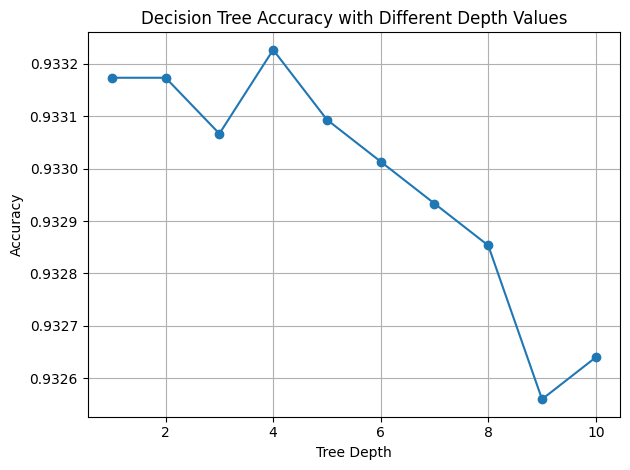

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depth_values = range(1, 11)
accuracy_scores = []

for depth in depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt_classifier.fit(X_train_std[:, [2, 3]], y_train)
    y_pred = dt_classifier.predict(X_test_std[:, [2, 3]])
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(depth_values, accuracy_scores, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy with Different Depth Values')
plt.grid()
plt.tight_layout()
plt.show()

* ##### From what we learned in class, depth = 4 seems better. 
* ##### Actually it doesn't make much difference.

## From the above analysis, we can see that the accuracy is always within a very small range, in other words, the choice of parameters does not help the accuracy as much as expected. This may be due to intrinsic reasons in the data.